In [33]:
from FastCCM import CCM, CCM_utils
from FastCCM.utils import utils
import numpy as np
import matplotlib.pyplot as plt
import pyEDM 
import pandas as pd 

In [34]:
ccm = CCM.PairwiseCCM(device="cpu")

In [39]:
X_to_Y_res_FastCCM = []
Y_to_X_res_FastCCM = []
X_to_Y_res_pyEDM = []
Y_to_X_res_pyEDM = []

for _ in range(100):
    X = np.random.normal(0,10,200)
    Y = np.random.uniform(0,10,200)
    df = pd.DataFrame([X,Y],index=["X","Y"]).T

    X_emb = np.transpose(utils.get_td_embedding_np(X[:,None],3,1),(2,0,1))
    Y_emb = np.transpose(utils.get_td_embedding_np(Y[:,None],3,1),(2,0,1))

    conv_test_res_FastCCM = CCM_utils.Functions("cpu").convergence_test(X = X_emb,
                                                                Y = Y_emb,
                                        subset_sizes = [100, 200],
                                        subsample_size=1000, exclusion_rad=5, tp=0, method="simplex",trials=1)

    conv_test_res_pyEDM = pyEDM.CCM(df,columns="X",target="Y",libSizes="100 200 100", sample=1, E=3, tau=-1, exclusionRadius=4).to_numpy()

    X_to_Y_res_FastCCM += [conv_test_res_FastCCM['X_to_Y'][:,:,-1,0].mean(axis=1)[-1][0]]
    Y_to_X_res_FastCCM += [conv_test_res_FastCCM['Y_to_X'][:,:,-1,0].mean(axis=1)[-1][0]]
    X_to_Y_res_pyEDM += [conv_test_res_pyEDM[-1,1]]
    Y_to_X_res_pyEDM += [conv_test_res_pyEDM[-1,2]]


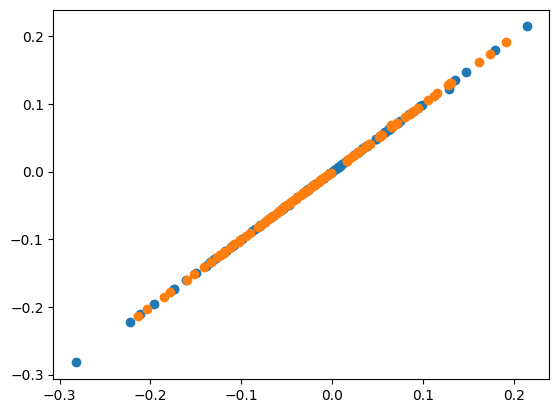

In [37]:
plt.scatter(X_to_Y_res_FastCCM, X_to_Y_res_pyEDM)
plt.scatter(Y_to_X_res_FastCCM, Y_to_X_res_pyEDM)

(array([ 1.,  1.,  0.,  2.,  0.,  0.,  0.,  1.,  0.,  3.,  0.,  1.,  1.,
         1.,  3.,  1.,  3.,  2.,  2.,  1.,  2.,  6.,  4.,  7.,  6.,  7.,
         4.,  9., 13., 10.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-6.66092329, -6.61611698, -6.57131067, -6.52650435, -6.48169804,
        -6.43689173, -6.39208542, -6.3472791 , -6.30247279, -6.25766648,
        -6.21286017, -6.16805386, -6.12324754, -6.07844123, -6.03363492,
        -5.98882861, -5.94402229, -5.89921598, -5.85440967, -5.80960336,
        -5.76479704, -5.71999073, -5.67518442, -5.63037811, -5.5855718 ,
        -5.54076548, -5.49595917, -5.45115286, -5.40634655, -5.361540

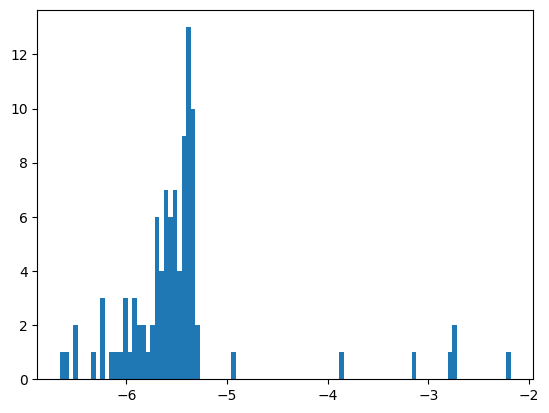

In [38]:
plt.hist(np.log10(np.abs(np.array(X_to_Y_res_FastCCM) - np.array(X_to_Y_res_pyEDM))),bins=100)


In [22]:
test_df = pd.read_csv("https://raw.githubusercontent.com/SugiharaLab/pyEDM/refs/heads/master/src/pyEDM/data/circle.csv")
val_df = pd.read_csv("https://raw.githubusercontent.com/SugiharaLab/pyEDM/refs/heads/master/src/pyEDM/tests/validation/SMap_circle_E2_embd_valid.csv")

In [29]:

X_emb = test_df[["x","y"]].to_numpy()[None]
y_emb = val_df["Observations"].to_numpy()[:-1][None,:,None]
y_val = val_df["Predictions"][1:].to_numpy()

Text(0.5, 0, 'error')

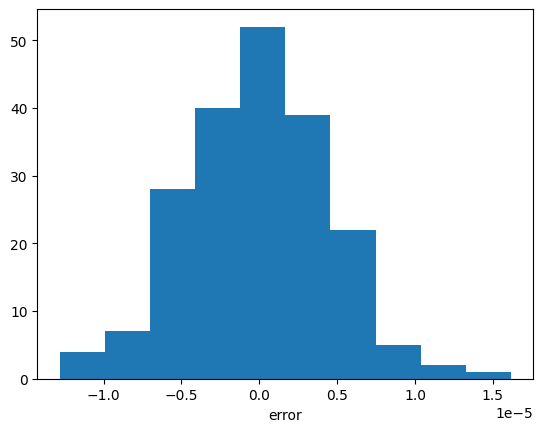

In [31]:
plt.hist(ccm.predict(X_emb,X_emb[:,:,[0]],tp=1,exclusion_rad=0,method="smap",theta=3).squeeze()-y_val[:])
plt.xlabel("error")

In [8]:
test_df = pd.read_csv("https://raw.githubusercontent.com/SugiharaLab/pyEDM/refs/heads/master/src/pyEDM/data/sardine_anchovy_sst.csv")

In [9]:
spx_prices = [ 31.0,  # 1920-1929
    17.4, 12.0, 5.6, 9.4, 9.6, 13.1, 18.0, 12.8, 13.1, 12.0,  # 1930-1939
    10.8, 9.2, 10.4, 12.7, 15.3, 18.4, 18.1, 15.3, 16.2, 16.9,  # 1940-1949
    20.4, 23.8, 26.6, 24.8, 35.9, 45.5, 46.7, 39.0, 55.2, 59.9,  # 1950-1959
    58.1, 71.6, 63.1, 75.0, 84.8, 92.4, 80.3, 96.5, 103.0, 92.0,  # 1960-1969
    92.2, 102.1, 118.1, 97.6, 68.6, 90.2, 107.5, 95.1, 96.1, 107.9,  # 1970-1979
    135.8, 122.6, 140.6, 164.9, 167.2, 211.3, 242.2, 247.1, 277.7, 353.4,  # 1980-1989
    330.2, 417.1, 435.7, 466.3, 459.3, 615.9, 740.7, 970.4, 1229.2, 1469.3,  # 1990-1999
    1320.3, 1148.1, 879.8, 1111.9, 1211.9, 1248.3, 1418.3,
]


In [10]:
test_df["snp500"] = np.log(spx_prices)

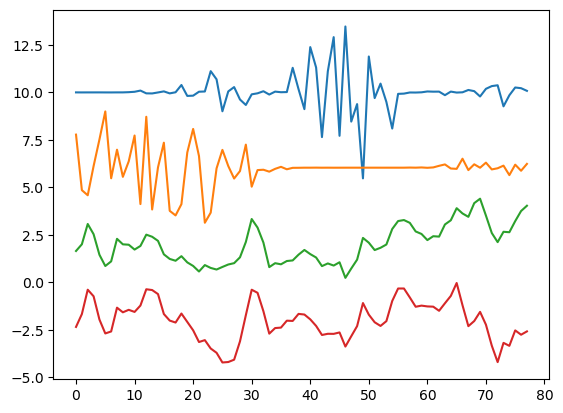

In [11]:
plt.plot(test_df["anchovy"]+10)
plt.plot(test_df["sardine"]+6)
plt.plot(test_df["sio_sst"]+2)
plt.plot(test_df["np_sst"]-2)

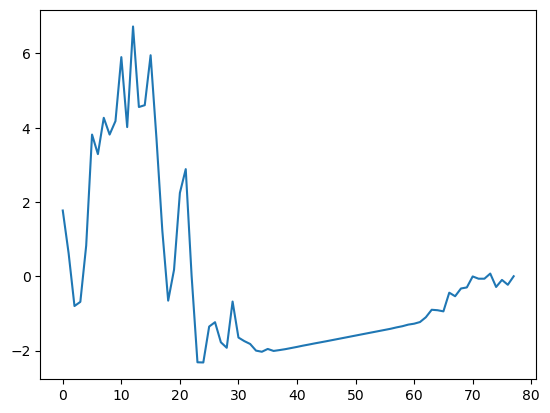

In [16]:
plt.plot(np.cumsum(test_df["sardine"]))

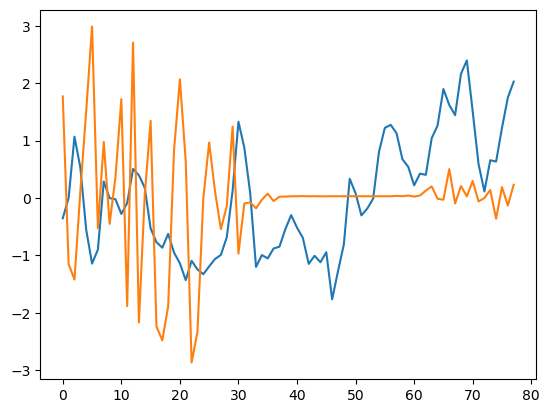

In [156]:
plt.plot((test_df["sio_sst"]))
plt.plot(test_df["sardine"])

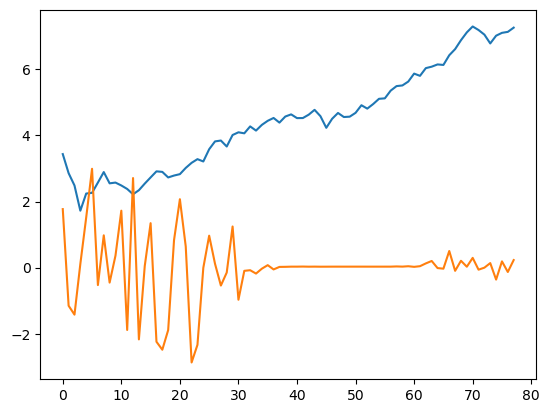

In [159]:
plt.plot((test_df["snp500"]))
plt.plot(test_df["sardine"])

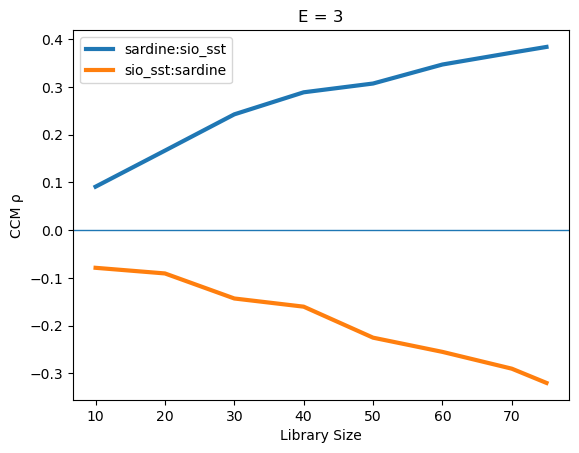

,LibSize,sardine:sio_sst,sio_sst:sardine
0,10,0.090861,-0.079050
1,20,0.166419,-0.090864
2,30,0.242379,-0.143310
3,40,0.288553,-0.160457
4,50,0.306940,-0.225386
5,60,0.346741,-0.255154
6,70,0.371520,-0.290336
7,75,0.383590,-0.320169


In [157]:
pyEDM.CCM( dataFrame = test_df, columns = 'sardine', target = 'sio_sst',
                      libSizes = [10,20,30,40,50,60,70,75], sample = 100,
                      E = 3, Tp = 0, tau = -1, seed = 777 ,showPlot=True)

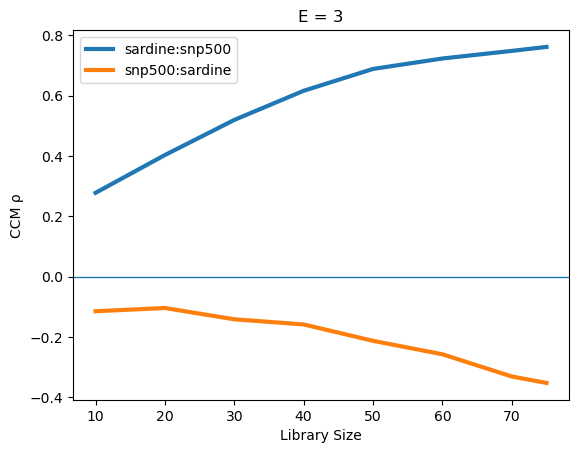

,LibSize,sardine:snp500,snp500:sardine
0,10,0.277616,-0.114652
1,20,0.402874,-0.103958
2,30,0.519120,-0.141341
3,40,0.615664,-0.158387
4,50,0.688038,-0.212675
5,60,0.722592,-0.257174
6,70,0.747814,-0.330819
7,75,0.760943,-0.352103


In [158]:
pyEDM.CCM( dataFrame = test_df, columns = 'sardine', target = 'snp500',
                      libSizes = [10,20,30,40,50,60,70,75], sample = 100,
                      E = 3, Tp = 0, tau = -1, seed = 777 ,showPlot=True)

In [110]:
X_emb = np.transpose(utils.get_td_embedding_np(test_df["sardine"].to_numpy()[:,None],3,1),(1,0,2)).T
Y_emb = np.transpose(utils.get_td_embedding_np((test_df["sio_sst"].to_numpy())[:,None],3,1),(1,0,2)).T

surr_data = pyEDM.AuxFunc.SurrogateData(test_df,"sio_sst",numSurrogates=100).to_numpy()[:,1:]

Y_emb_surr = np.transpose(utils.get_td_embedding_np(surr_data,3,1),axes=(2,0,1))
#Y_emb_surr = np.transpose(utils.get_td_embedding_np(np.random.normal(0,1,(78,100)),3,1),axes=(2,0,1))+ (np.arange(0,76)/20)[None,:,None]
X_emb_surr = np.transpose(utils.get_td_embedding_np(np.random.normal(0,1,(78,1)),3,1),axes=(2,0,1))+ (np.arange(0,76)/20)[None,:,None]

/home/iaroslav/miniconda3/lib/python3.12/site-packages/pyEDM/AuxFunc.py:263: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ s + 1 ] = scaled


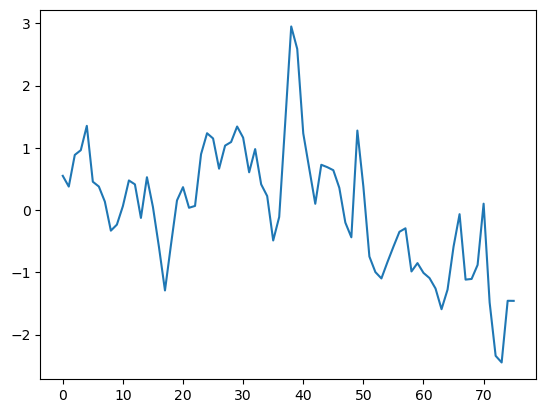

In [138]:
plt.plot(Y_emb_surr[0,:,2])

In [49]:
conv_res = CCM_utils.Functions("cpu").convergence_test(X = X_emb,
                                                                Y = Y_emb,
                                        subset_sizes = [10,20,30,40,50,60,70,75],
                                        subsample_size=1000, exclusion_rad=1, tp=0, method="simplex",trials=100)

In [50]:
conv_res_surr = CCM_utils.Functions("cpu").convergence_test(X = X_emb,
                                                                Y = Y_emb_surr,
                                        subset_sizes = [10,20,30,40,50,60,70,75],
                                        subsample_size=1000, exclusion_rad=1, tp=0, method="simplex",trials=1)

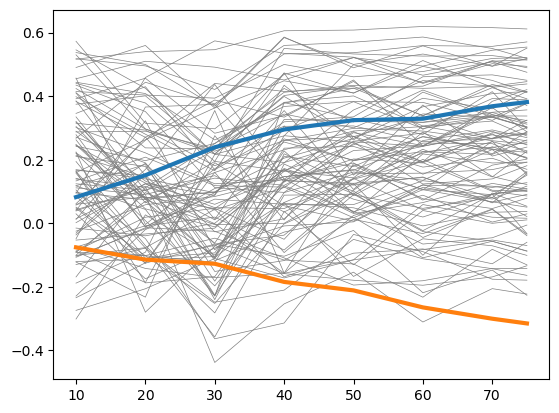

In [51]:


plt.plot(conv_res_surr["subset_sizes"],conv_res_surr["X_to_Y"][:,:,-1].mean(axis=1)[:,:,0],color='gray',lw=0.5)
plt.plot(conv_res["subset_sizes"],conv_res['X_to_Y'][:,:,-1,0].mean(axis=1).squeeze(),zorder=10,lw=3)
plt.plot(conv_res["subset_sizes"],conv_res['Y_to_X'][:,:,-1,0].mean(axis=1).squeeze(),zorder=10,lw=3)

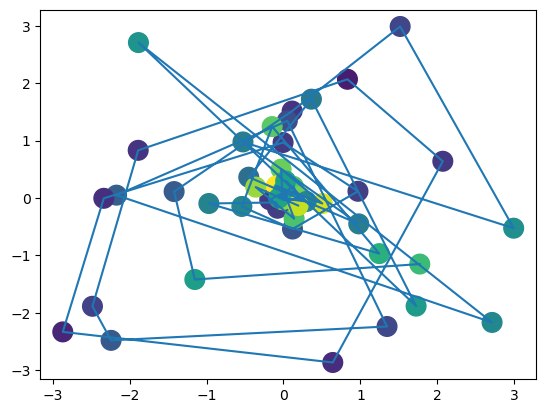

In [24]:
plt.scatter(test_df["sardine"][:-2],test_df["sardine"][1:-1],c=test_df["sio_sst"][2:],s=200)
plt.plot(test_df["sardine"][:-2],test_df["sardine"][1:-1])

In [25]:
def generate_ebisuzaki_surrogates(x):
    n = len(x)

    Xf = np.fft.fft(x)
    amplitudes = np.abs(Xf)
    phases = np.angle(Xf)

    random_phases = np.zeros(n, dtype=np.float64)
    random_phases[0] = phases[0]  # Keep the zero frequency component unchanged

    if n % 2 == 0:
        random_phases[n // 2] = phases[n // 2]  # Nyquist frequency component
        pos_freq = np.arange(1, n // 2)
    else:
        pos_freq = np.arange(1, (n + 1) // 2)

    random_phases[pos_freq] = np.random.uniform(0, 2 * np.pi, size=len(pos_freq))
    # Ensure Hermitian symmetry for negative frequencies
    random_phases[-pos_freq] = -random_phases[pos_freq]

    surrogate_spectrum = amplitudes * np.exp(1j * random_phases)

    surrogate_x = np.fft.ifft(surrogate_spectrum).real

    return surrogate_x

In [161]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(test_df["sio_sst"])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -0.760677863835497
p-value: 0.8304007257706593


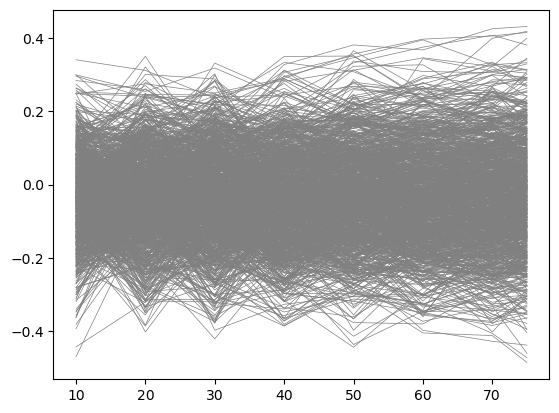

In [106]:

X_emb_rand = np.transpose(utils.get_td_embedding_np(np.random.normal(0,1,(78,1)),3,1),axes=(2,0,1))
Y_emb_rand = np.transpose(utils.get_td_embedding_np(np.random.normal(0,1,(78,1000)),3,1),axes=(2,0,1))

conv_res_rand = CCM_utils.Functions("cpu").convergence_test(X = X_emb_rand,
                                                                Y = Y_emb_rand,
                                        subset_sizes = [10,20,30,40,50,60,70,75],
                                        subsample_size=1000, exclusion_rad=1, tp=0, method="simplex",trials=1)
plt.plot(conv_res_rand["subset_sizes"],conv_res_rand["X_to_Y"][:,:,-1].mean(axis=1)[:,:,0],color='gray',lw=0.5)
plt.show()

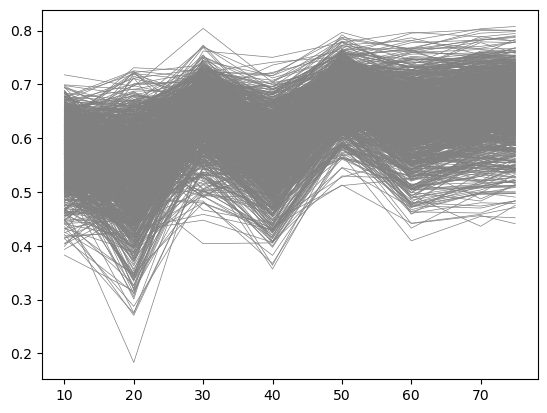

In [108]:

X_emb_rand = np.transpose(utils.get_td_embedding_np(np.random.normal(0,1,(78,1)),3,1),axes=(2,0,1)) * (np.arange(0,76)/25)[None,:,None]
Y_emb_rand = np.transpose(utils.get_td_embedding_np(np.random.normal(0,1,(78,1000)),3,1),axes=(2,0,1)) + (np.arange(0,76)/10)[None,:,None]

conv_res_rand = CCM_utils.Functions("cpu").convergence_test(X = X_emb_rand,
                                                                Y = Y_emb_rand,
                                        subset_sizes = [10,20,30,40,50,60,70,75],
                                        subsample_size=1000, exclusion_rad=1, tp=0, method="simplex",trials=1)
plt.plot(conv_res_rand["subset_sizes"],conv_res_rand["X_to_Y"][:,:,-1].mean(axis=1)[:,:,0],color='gray',lw=0.5)
plt.show()